Нейронная сеть, которая будет рекомендовать соотношение матрица-наполнитель

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from tensorflow import keras as keras
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [143]:
# Загрузим очищенные данные, подготовленные на предыдущем шаге
datnor = pd.read_excel('/kaggle/input/normdate/data_normals.xlsx', index_col=0)
datnor.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Соотношение матрица-наполнитель,-0.851796,-0.851796,-0.111351,-0.114116,-0.274727,-0.281323,0.525013,0.505025,0.008802,-0.025475,...,-0.484686,-1.022620,-0.082815,0.677967,-0.121560,-0.516313,0.433493,0.301133,0.645156,0.728312
"Плотность, кг/м3",0.540127,0.540127,0.540127,0.232532,-0.690254,-0.792785,-0.485190,1.257848,1.873038,0.130000,...,-0.473431,0.383997,-1.071008,-0.642787,0.237721,-0.258719,0.746104,-0.050734,0.917441,-0.891077
"модуль упругости, ГПа",-0.005232,-0.005232,0.025716,0.014867,0.142884,-0.447294,0.320805,1.475124,0.416275,1.924267,...,-0.406046,0.216796,0.553011,-0.131194,0.419669,0.372566,-0.643154,-0.703682,0.000710,-0.702641
"Количество отвердителя, м.%",-1.624800,0.491501,0.032344,0.032344,0.032344,0.032344,0.491501,0.491501,0.491501,0.491501,...,-0.372438,-0.205541,0.952244,0.008746,0.867127,-0.633830,0.946425,-0.003192,0.823625,0.496414
"Содержание эпоксидных групп,%_2",0.450671,-0.286424,0.013679,0.013679,0.013679,0.013679,-0.286424,-0.286424,-0.286424,-0.286424,...,-0.022106,-0.338503,-0.195234,1.091247,-0.248237,-0.618634,-0.772976,0.511851,-0.877002,1.548874
"Температура вспышки, С_2",-0.022968,0.262327,-0.022968,-0.022968,-0.022968,-0.022968,0.262327,0.262327,0.262327,0.262327,...,-1.317123,-0.266352,0.520100,0.443993,-0.222554,0.721751,-0.586711,-0.694125,-0.186816,0.279994
"Поверхностная плотность, г/м2",-0.567353,-0.567353,-0.567353,-0.567353,-0.567353,-0.166929,-0.166929,1.316997,1.316997,1.316997,...,-0.929518,0.386995,0.821493,0.418078,-0.908642,-0.569240,-0.236035,0.681365,0.448943,0.725188
"Модуль упругости при растяжении, ГПа",-0.792195,-0.792195,-0.792195,-0.792195,-0.792195,0.433971,0.433971,1.169671,1.169671,1.169671,...,1.204889,1.452785,-0.101728,0.686697,-1.372478,-0.034189,-0.075912,0.368823,0.199211,0.264687
"Прочность при растяжении, МПа",0.868897,0.868897,0.868897,0.868897,0.868897,-1.049178,-1.049178,-0.729499,-0.729499,-0.729499,...,-0.826509,0.099295,-0.020637,0.016833,1.032796,-0.110452,-0.153448,0.330088,-0.614868,0.639254
"Потребление смолы, г/м2",0.016769,0.016769,0.016769,0.016769,0.016769,-1.270852,-1.270852,1.046867,1.046867,1.046867,...,-1.692289,0.176798,1.140415,-0.856435,0.142703,-1.206373,-1.300080,0.230602,-0.277761,-0.308299


In [144]:
# Зададим вход и выход для модели нейронной сети: на входе будет весь датасет,  а на выходе - набор соотношений матрица-наполнитель
mn = datnor['Соотношение матрица-наполнитель']
mn_v = datnor.loc[:, datnor.columns != 'Соотношение матрица-наполнитель']

In [145]:
mn_v.shape

(1000, 12)

In [146]:
# Разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(mn_v, mn, test_size = 0.3, random_state = 73)

Строим полносвязную нейронную сеть (feed forward neural network). Выходной слой с одним линейным нейроном — для задачи регрессии. Функции активации — RELU и TANH в промежуточном слое и sigmoid в выходном.

In [155]:
#model = Sequential()
#model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
#model.add(Dense(8, activation='tanh'))
#model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1
model = Sequential()
model.add(layers.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(1, activation='tanh'))
print(model.summary()) # архитектура нашей модели

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 128)               1664      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_71 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________
None


In [157]:
# Компилируем сеть
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile('RMSProp', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.compile(optimizer='RMSProp',loss='mse', metrics=['mae'])
# И обучаем:
history = model.fit(x_train, 
                    y_train, 
                    epochs=188, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/188
20/20 - 1s - loss: 0.1158 - mae: 0.2627 - val_loss: 0.9582 - val_mae: 0.8183 - 784ms/epoch - 39ms/step
Epoch 2/188
20/20 - 0s - loss: 0.1085 - mae: 0.2553 - val_loss: 0.9793 - val_mae: 0.8160 - 66ms/epoch - 3ms/step
Epoch 3/188
20/20 - 0s - loss: 0.1164 - mae: 0.2598 - val_loss: 0.9716 - val_mae: 0.8262 - 66ms/epoch - 3ms/step
Epoch 4/188
20/20 - 0s - loss: 0.1184 - mae: 0.2613 - val_loss: 0.9137 - val_mae: 0.8000 - 65ms/epoch - 3ms/step
Epoch 5/188
20/20 - 0s - loss: 0.1208 - mae: 0.2699 - val_loss: 0.9880 - val_mae: 0.8400 - 67ms/epoch - 3ms/step
Epoch 6/188
20/20 - 0s - loss: 0.1134 - mae: 0.2593 - val_loss: 0.9672 - val_mae: 0.8275 - 84ms/epoch - 4ms/step
Epoch 7/188
20/20 - 0s - loss: 0.1134 - mae: 0.2608 - val_loss: 0.9474 - val_mae: 0.8106 - 81ms/epoch - 4ms/step
Epoch 8/188
20/20 - 0s - loss: 0.1059 - mae: 0.2416 - val_loss: 0.9423 - val_mae: 0.8159 - 83ms/epoch - 4ms/step
Epoch 9/188
20/20 - 0s - loss: 0.1104 - mae: 0.2561 - val_loss: 0.9904 - val_mae: 0.8306 - 77m

10/10 [==============================] - 0s 2ms/step


AttributeError: 'function' object has no attribute 'xlabel'

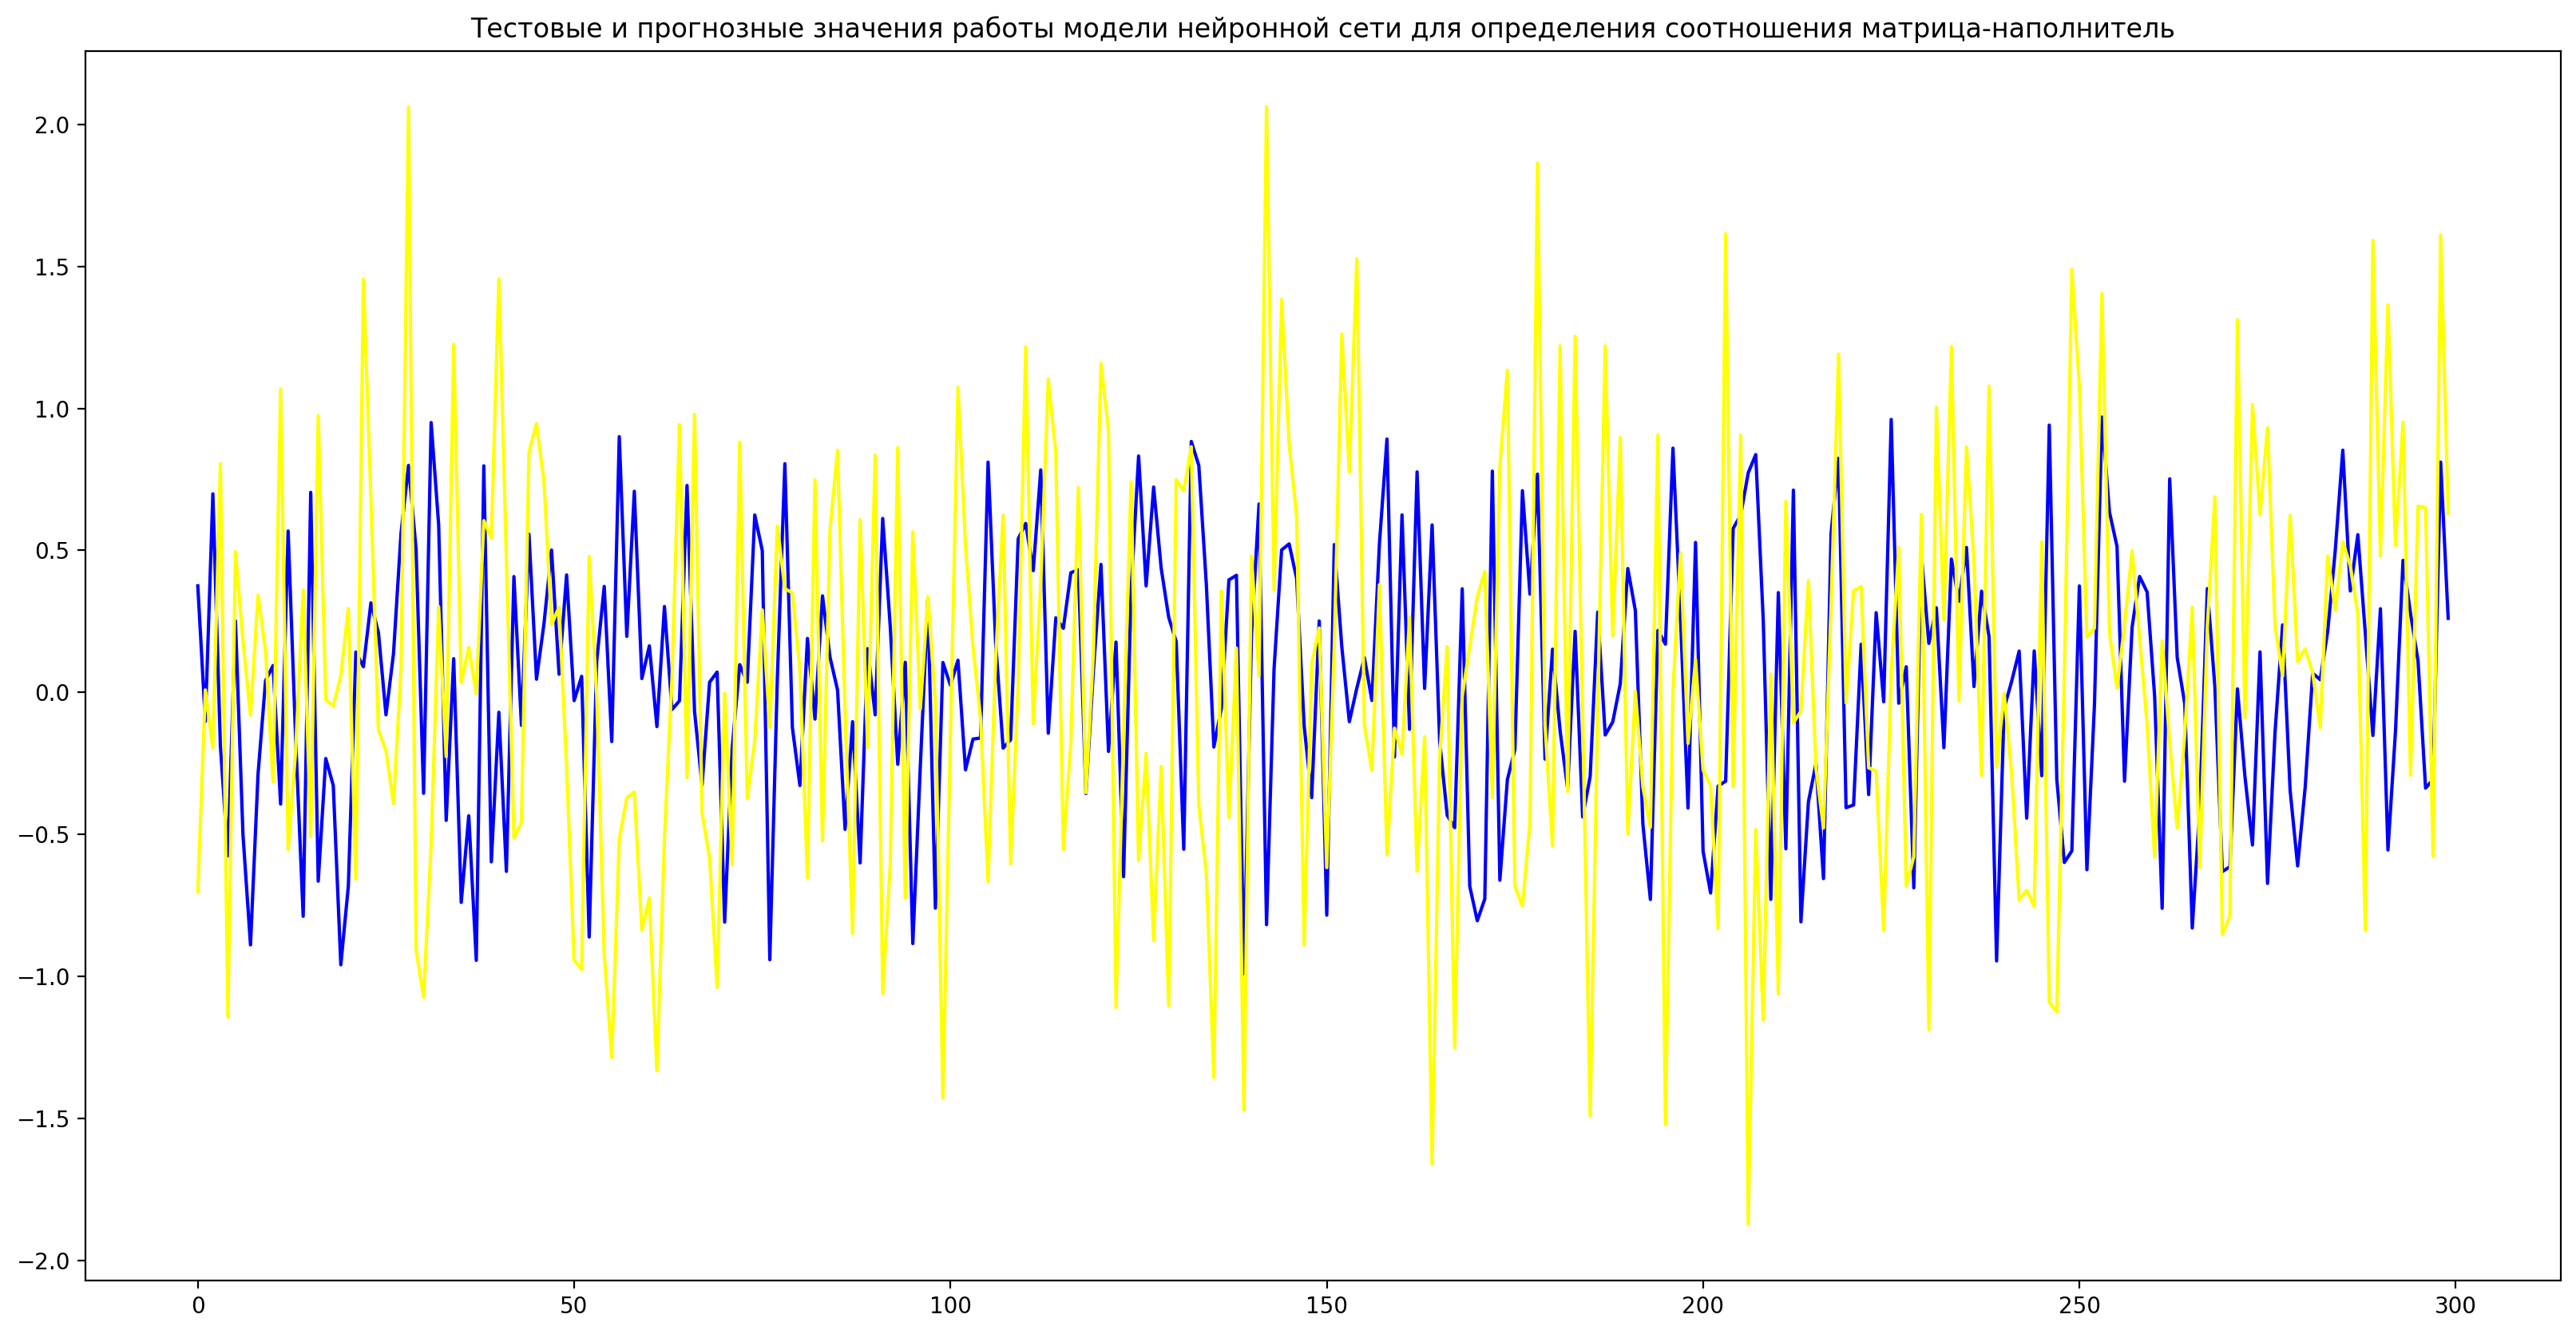

In [158]:
# Визуализация модели НС для соотношения матрица-наполнитель:
y_pred_ns = model.predict(x_test)
ns = model
# Визуализируем полученные результаты работы модели :
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения работы модели нейронной сети для определения соотношения матрица-наполнитель")
plt.plot(y_pred_ns, label = "Прогноз", color = 'blue')
plt.plot(y_test.values, label = "Тест", color = 'yellow')
plt.plot.xlabel('Порядок')
plt.ylabel("х")
plt.legend()
plt.grid(True)

In [151]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test).flatten() 

10/10 [==============================] - 0s 2ms/step


In [152]:
# Проверяем, какая ошибка (средний модуль отклонения) получилась:

# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

ValueError: operands could not be broadcast together with shapes (19200,) (300,) 

In [ ]:
# Считаем графики ошибки
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

In [ ]:
# Гистограмма ошибок следующая:

#Разность предсказанного и правильного ответа
error = pred - y_test
#Построение гистограммы
plt.hist(abs(error), bins = 10)
plt.xlabel("Значение ошибки")
plt.ylabel("Количество")
plt.show()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,6)) # метрики и функции потерь

In [153]:
# оценим модель:
mae_ns_train = mean_absolute_error(y_train, model.predict(x_train.values))
mae_ns_test = mean_absolute_error(y_test, model.predict(x_test.values))
mse_ns_train = mean_squared_error(y_train, model.predict(x_train.values))
mse_ns_test = mean_squared_error(y_test, model.predict(x_test.values))
R2_ns_train = r2_score(y_train, model.predict(x_train.values))
R2_ns_test = r2_score(y_test, model.predict(x_test.values))

print('mae_ns_train на тренировочной выборке: %.3f' %mean_absolute_error(y_train, model.predict(x_train)))
print('mae_ns_test на тестовой выборке: %.3f' %mean_absolute_error(y_test, model.predict(x_test)))
print('mse_ns_train на тренировочной выборке: %.3f' %mean_squared_error(y_train, model.predict(x_train)))
print('mse_ns_test на тестовой выборке: %.3f' %mean_squared_error(y_test, model.predict(x_test)))
print("R2_ns_test на тестовой выборке: {:.2f}".format(r2_score(y_test, model.predict(x_test.values))))
print("R2_ns_train на тренировочной выборке: {:.2f}".format(r2_score(y_train, model.predict(x_train.values))))

22/22 [==============================] - 0s 1ms/step


ValueError: y_true and y_pred have different number of output (1!=64)

In [159]:
#сведем результаты работы нейросети по основным исследуемым метрикам в таблицу:
df_ns = {'Модель': ['NS_train', 'NS_test'], 'MAE': [mae_ns_train, mae_ns_test], 'MSE':[mse_ns_train, mse_ns_test], 'R2':[R2_ns_train, R2_ns_test]} 
df_ns = pd.DataFrame(df_ns)
df_ns

,Модель,MAE,MSE,R2
0,NS_train,0.535632,0.462224,0.160441
1,NS_test,0.604093,0.584658,-0.132392
